In [2]:
#download the data
from keras.datasets import imdb 
top_words = 5000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
# Truncate and pad the review sequences 
from keras.preprocessing import sequence 
max_review_length = 500 
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length) 
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length) 

In [5]:
from keras.layers import LSTM

# Build the model 
embedding_vector_length = 32 
model = Sequential() 
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length)) 
model.add(LSTM(100)) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 
print(model.summary()) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64) 


Instructions for updating:
Use tf.cast instead.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1052s 42ms/step - loss: 0.4842 - acc: 0.7547 - val_loss: 0.3415 - val_acc: 0.8568
Epoch 2/3
25000/25000 [==============================] - 1078s 43ms/step - loss: 0.3016 - acc: 0.8787 - val_loss: 0.2997 - val_acc: 0.8776
Epoch 3/3
25000/25000 [==============================] - 1067s 43ms/step - loss: 0.3119 - acc: 0.8679 - val_loss: 0.3150 - val_acc: 0.8751


In [9]:
#Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.51%


In [55]:
from keras.models import save_model

save_model(model, 'model_lstm_export.h5')

In [42]:
%%time

_ = model.predict(X_test[:5000,:])

CPU times: user 41.3 s, sys: 43.5 s, total: 1min 24s
Wall time: 46.8 s


In [44]:
benchmark_dict = { 'time_seconds' : [231, 186, 138, 92, 46], 'size_of_array' : [25000, 20000, 15000, 10000, 5000]}

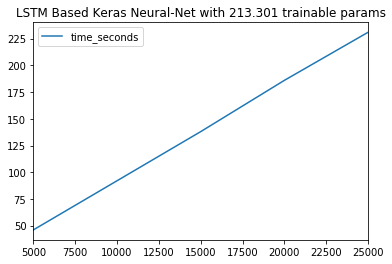

In [45]:
%matplotlib inline
import pandas as pd

pd.DataFrame(benchmark_dict, index=benchmark_dict["size_of_array"]).plot(y='time_seconds', title="LSTM Based Keras Neural-Net with 213.301 trainable params")